# Manipulating higher-order datasets

In this notebook, we will demonstrate how to manipulate higher-order datasets by
* converting higher-order datasets into different representations
* getting subsets of nodes and edges

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import xgi

In [2]:
H = xgi.load_xgi_data("email-enron")
H.cleanup()

## Converting between different representations

### Incidence matrix

The incidence matrix of a hypergraph is 

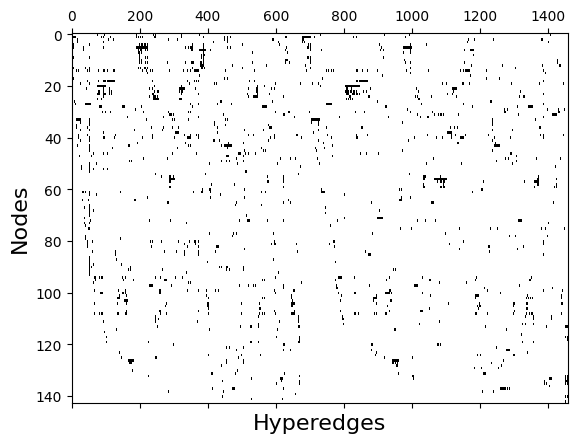

In [3]:
I = xgi.incidence_matrix(H, sparse=False)
plt.spy(I, aspect="auto")
plt.xlabel("Hyperedges", fontsize=16)
plt.ylabel("Nodes", fontsize=16)
plt.show()

### Bipartite network

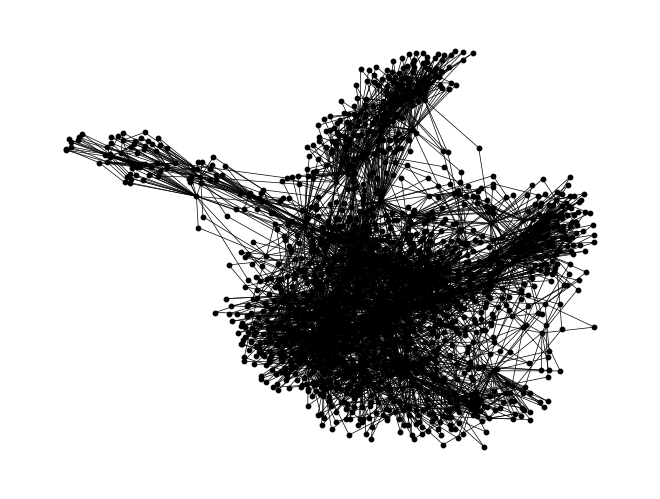

In [4]:
G, index1, index2 = xgi.to_bipartite_graph(H, index=True)
nx.draw(G, node_color="black", node_size=10, width=0.5)

### Adjacency matrix

Text(0, 0.5, 'Nodes')

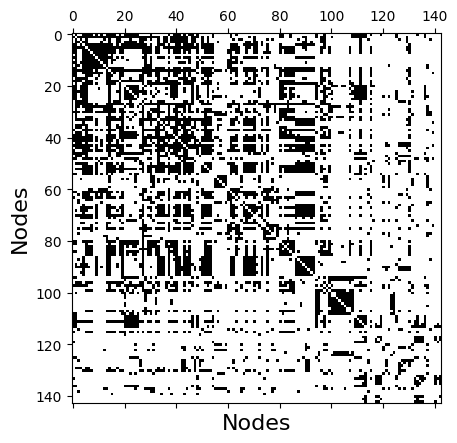

In [5]:
A = xgi.adjacency_matrix(H, sparse=False)
plt.spy(A)
plt.xlabel("Nodes", fontsize=16)
plt.ylabel("Nodes", fontsize=16)

### Line graph

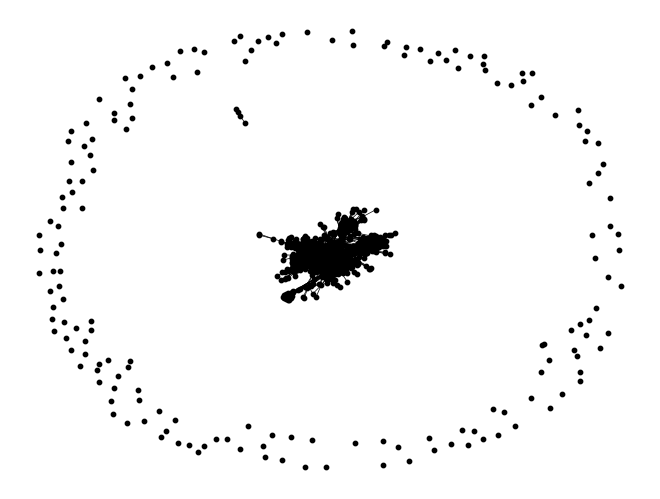

In [6]:
G = xgi.to_line_graph(H, s=2)
nx.draw(G, node_color="black", node_size=10, width=0.5)

### The dual of a hypergraph

The *dual* of a hypergraph, $H = (V, E)$ is obtained by mapping its nodes to edges and edges to nodes. The resulting hypergraph should now have $|E|$ nodes and $|V|$ edges.

In [7]:
D = H.dual()
print(D)

Hypergraph named email-Enron with 1459 nodes and 143 hyperedges


## Getting subsets of the nodes and edges

`subhypergraph` is a method for returning a hypergraph built from subsets of nodes and edges. This object is read-only.

In [8]:
# A subhypergraph induced on nodes
node_subhypergraph = xgi.subhypergraph(H, nodes=list(range(100)))
# A subhypergraph induced on edges
edge_subhypergraph = xgi.subhypergraph(H, edges=list(range(100)))
# A subhypergraph induced on both nodes and edges
arbitrary_subhypergraph = xgi.subhypergraph(
    H, nodes=list(range(100)), edges=list(range(100))
)

In [9]:
# Frozen hypergraphs are read-only!
# arbitrary_subhypergraph.add_node("test")

We can get around the read-only by copying:

In [10]:
hcopy = arbitrary_subhypergraph.copy()
hcopy.add_node("test")

We can also select subsets of nodes and edges by calling `H.nodes(<subsets of nodes>)` and `H.edges(<subsets of edges>)`

In [11]:
H.nodes([0, 1, 2])

NodeView((0, 1, 2))

In [12]:
H.edges([1])

EdgeView((1,))

## Challenge
* Create a dictionary of hypergraphs from the `diseasome` dataset, each hypergraph containing edges of a single size for each edge size in the original dataset. Verify that only one size is present in each hypergraph.
* Cleanup the `email-eu` dataset and then find its dual. Is this dataset connected? Does it contain isolates? Multiedges? Singletons?
* Clean the `hospital-lyon` dataset and convert to a simplicial complex. Compute the 2-order Hodge Laplacian and visualize with a `spy` plot.
* In the `kaggle-whats-cooking` dataset, create a dictionary of hypergraphs for each of the 20 different types of cuisine, each containing only a single cuisine.
  * How many ingredients are unused in each cuisine?
  * What is the most used ingredient in each cuisine?
  * How many components are in each hypergraph filtered by cuisine?